In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)





import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = "darkgrid")

In [2]:
data = pd.read_csv("/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv")
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Recorrer dataset

In [3]:
rows, columns = data.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 252000
Columns: 13


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

# Analizar columnas numericas

In [7]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [8]:
data.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


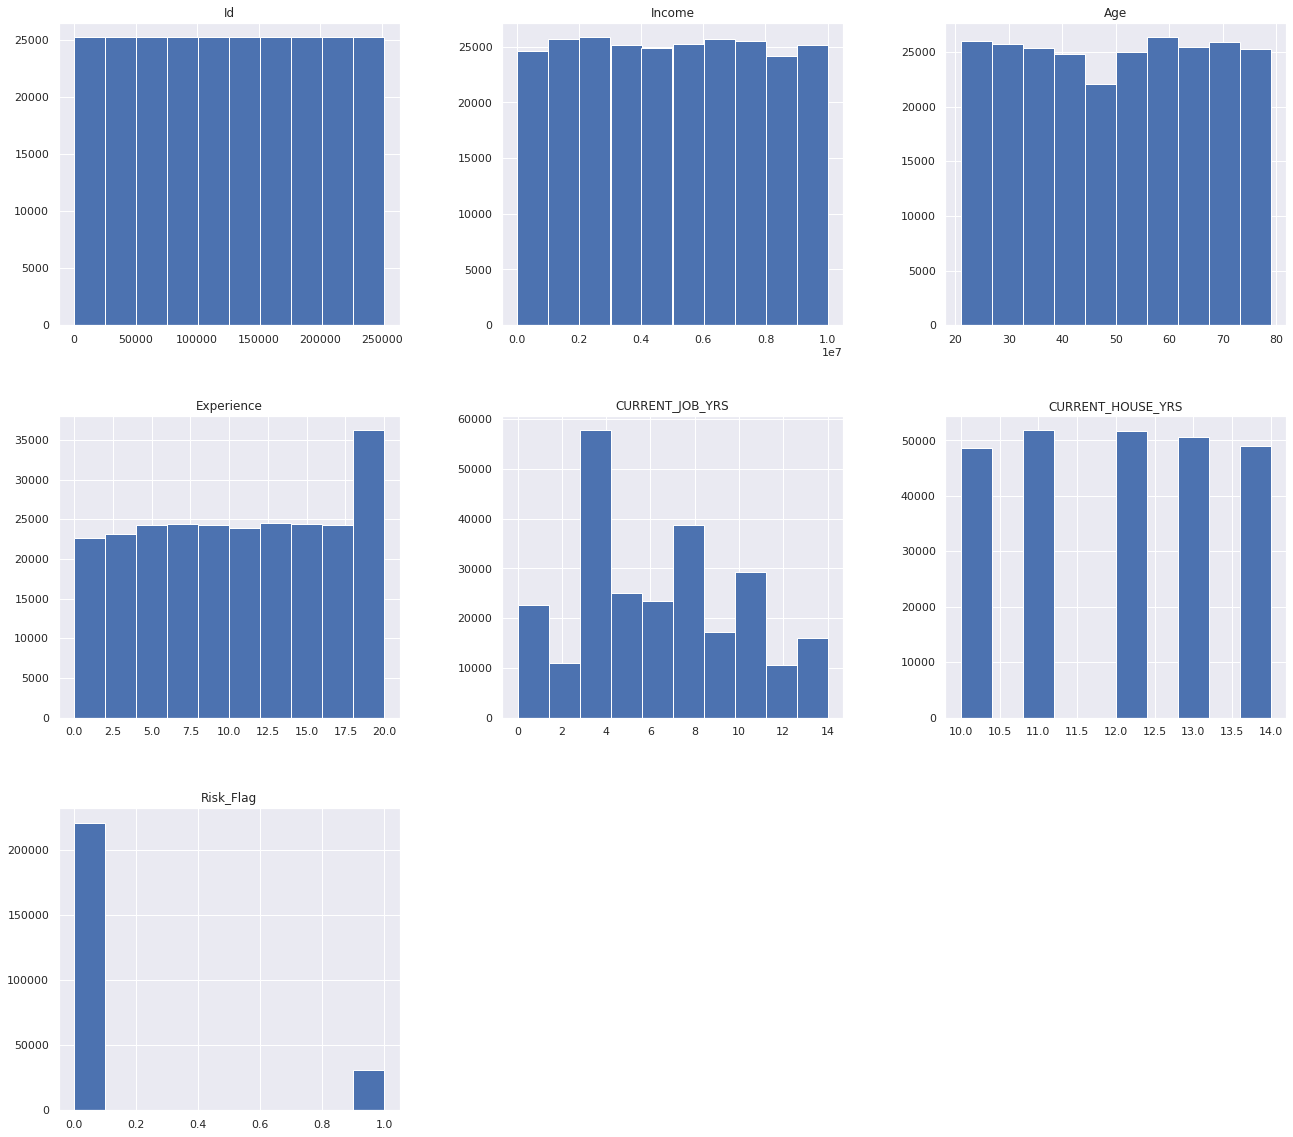

In [9]:
data.hist( figsize = (22, 20) )
plt.show()

In [10]:
data["Risk_Flag"].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

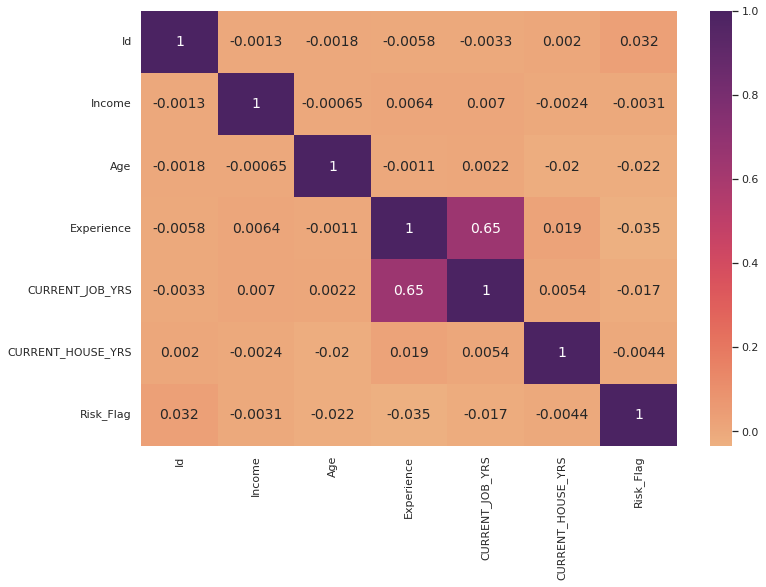

In [11]:
fig, ax = plt.subplots( figsize = (12,8) )

corr_matrix = data.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})

plt.show()

# Analizar columnas categoricas

In [12]:
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

single     226272
married     25728
Name: Married/Single, dtype: int64


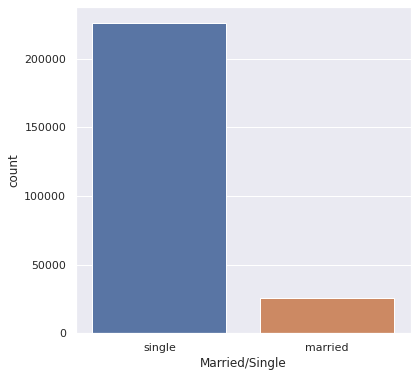

In [13]:
categorical_valcount_hist("Married/Single")

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64


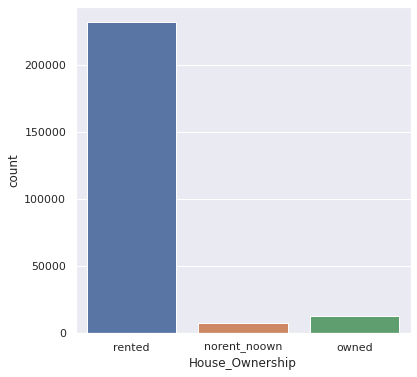

In [14]:
categorical_valcount_hist("House_Ownership")

In [15]:
print( "Total categories in STATE:", len( data["STATE"].unique() ) )
print()
print( data["STATE"].value_counts() )

Total categories in STATE: 29

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64


In [16]:
print( "Total categories in Profession:", len( data["Profession"].unique() ) )
print()
data["Profession"].value_counts()

Total categories in Profession: 51



Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

# Data Analysis

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


<AxesSubplot:xlabel='Risk_Flag', ylabel='Income'>

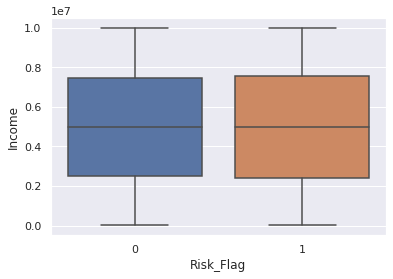

In [18]:
sns.boxplot(x ="Risk_Flag",y="Income" ,data = data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='Age'>

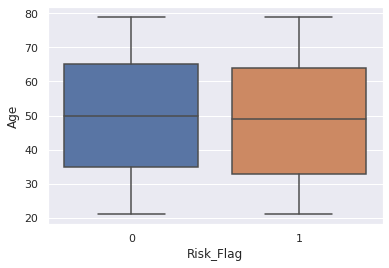

In [19]:
sns.boxplot(x ="Risk_Flag",y="Age" ,data = data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='Experience'>

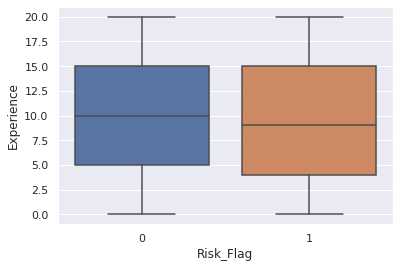

In [20]:
sns.boxplot(x ="Risk_Flag",y="Experience" ,data = data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

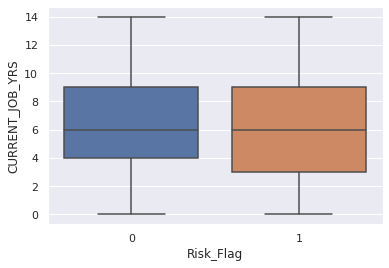

In [21]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_JOB_YRS" ,data = data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_HOUSE_YRS'>

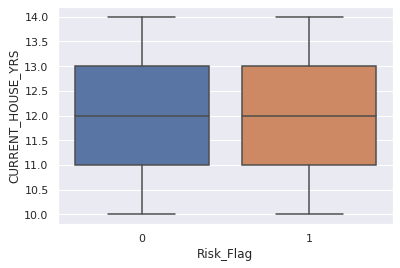

In [22]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_HOUSE_YRS" ,data = data)

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

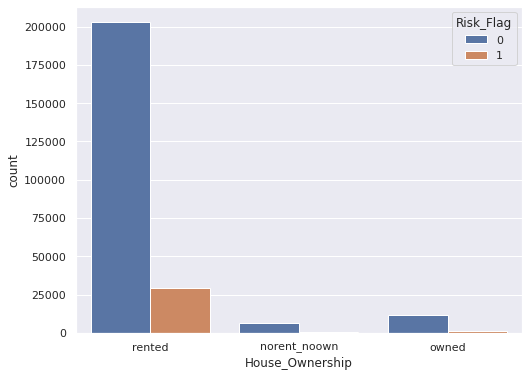

In [23]:
fig, ax = plt.subplots( figsize = (8, 6) )
sns.countplot(x='House_Ownership', hue='Risk_Flag', ax=ax, data=data)

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

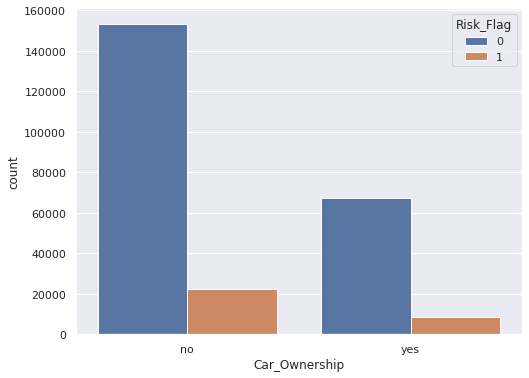

In [24]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='Car_Ownership', hue='Risk_Flag', ax=ax, data=data)

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

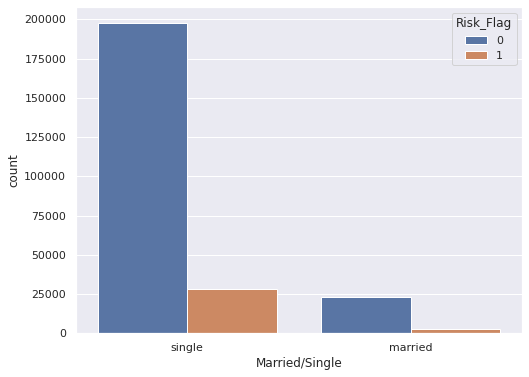

In [25]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='Married/Single', hue='Risk_Flag', data=data )

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

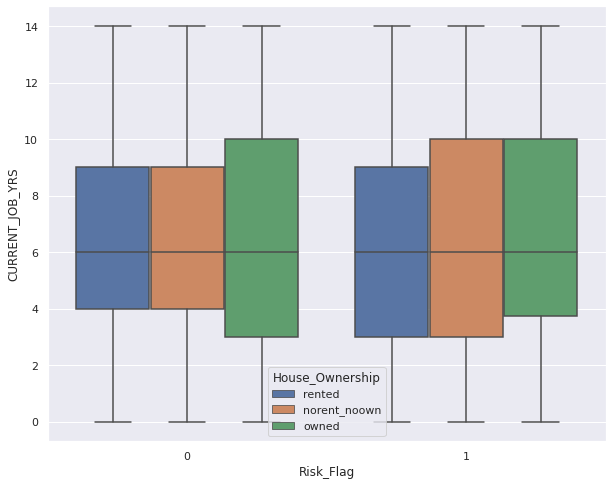

In [26]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "Risk_Flag", y = "CURRENT_JOB_YRS", hue='House_Ownership', data = data)

# Feature Engineering

Se procesara a las variables categoricas de la siguiente manera:

marital_status, car_ownership – binarise

house_ownership – one-hot

profession, city, state – target encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [29]:
label_encoder = LabelEncoder()

for col in ['Married/Single','Car_Ownership']:
    data[col] = label_encoder.fit_transform( data[col] )

In [30]:
onehot_encoder = OneHotEncoder(sparse = False)
data['House_Ownership'] = onehot_encoder.fit_transform(data['House_Ownership'].values.reshape(-1, 1) )

In [31]:
high_card_features = ['Profession', 'CITY', 'STATE']

from category_encoders import CatBoostEncoder

CBE_encoder = CatBoostEncoder()
for col in high_card_features:
    data[col] = CBE_encoder.fit_transform(data[col], data["Risk_Flag"])



##count_encoder = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
##count_encoded = count_encoder.fit_transform( data[high_card_features] )
##data = data.join(count_encoded.add_suffix("_count"))

In [32]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,0.0,0,0.1230,0.123,0.123,3,13,0
1,2,7574516,40,10,1,0.0,0,0.1230,0.123,0.123,9,13,0
2,3,3991815,66,4,0,0.0,0,0.1230,0.123,0.123,4,10,0
3,4,6256451,41,2,1,0.0,1,0.0615,0.123,0.123,2,12,1
4,5,5768871,47,11,1,0.0,0,0.1230,0.123,0.123,3,14,1


In [33]:
#data= data.drop(labels=['Profession', 'CITY', 'STATE'], axis=1)

In [34]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,0.0,0,0.1230,0.123,0.123,3,13,0
1,2,7574516,40,10,1,0.0,0,0.1230,0.123,0.123,9,13,0
2,3,3991815,66,4,0,0.0,0,0.1230,0.123,0.123,4,10,0
3,4,6256451,41,2,1,0.0,1,0.0615,0.123,0.123,2,12,1
4,5,5768871,47,11,1,0.0,0,0.1230,0.123,0.123,3,14,1


# Separar data en train y test

In [35]:
x = data.drop(["Risk_Flag","Id"], axis=1)
y = data["Risk_Flag"]

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7)

# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


In [38]:
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)

smote_sampler = SMOTE(random_state=9)

pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

print("-------------------------TEST SCORES RF_CLF-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES RF_CLF-----------------------
Recall: 64.0103
Precision: 49.1454
F1-Score: 55.6015
Accuracy score: 87.4266
AUC Score: 77.3605


# Neural network

In [40]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import metrics

from sklearn.preprocessing import StandardScaler

num_cols = ['Income', 'Age', 'Experience','CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
datann= data.copy()
datann[num_cols] = StandardScaler().fit_transform(datann[num_cols].astype(float))
x = datann.drop(["Risk_Flag","Id"], axis=1)
y = datann.Risk_Flag
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 7)

In [41]:
x_train.head


<bound method NDFrame.head of           Income       Age  Experience  Married/Single  House_Ownership  \
208660  0.193503  1.174762   -1.513422               1              0.0   
84514   0.854949 -0.583344   -1.346827               1              0.0   
24152   1.735402 -0.583344    0.652314               0              0.0   
218055 -0.094477 -0.524740    1.651884               1              0.0   
225640 -0.439666 -1.462396   -1.346827               0              0.0   
...          ...       ...         ...             ...              ...   
43125   0.666649  0.823141   -1.680018               1              0.0   
248640 -0.788137  0.998951    0.652314               1              0.0   
118417  1.400927  1.291969   -0.680447               1              0.0   
110176 -0.837462  0.002692   -0.680447               1              0.0   
238347 -1.129867  1.643590   -1.346827               1              0.0   

        Car_Ownership  Profession      CITY     STATE  CURRENT_JOB_YR

In [42]:
def create_model(learning_rate, METRICS):
    model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.4),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.4),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.4),
    layers.Dense(1, activation = "sigmoid")])
    
    model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
    loss='binary_crossentropy',
    metrics=METRICS,
    )
    return model

def train_model(model,x_train, x_test, y_train, y_test, epochs):
    history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=1024,
    epochs=epochs,
    callbacks=[early_stopping,ReduceLROnPlateau])
    
    epochs = history.epoch
    
    hist = pd.DataFrame(history.history)
    return epochs, hist



In [43]:
early_stopping = callbacks.EarlyStopping(
    monitor = "AUC",
    mode = "max",
    patience = 8,
    min_delta=0.001,
    restore_best_weights=True,
)
ReduceLROnPlateau = callbacks.ReduceLROnPlateau(
    monitor="AUC",
    patience = 8)

In [44]:
input_shape = [x_train.shape[1]]
learning_rate = 0.006
epochs = 100
classification_threshold = 0.1566
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy', 
                                      threshold=classification_threshold),
      keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision' 
                                 ),
      keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
      keras.metrics.AUC()
    ]

    
model = create_model(learning_rate, METRICS)
epochs, hist = train_model(model,x_train, x_test, y_train, y_test, epochs)



Epoch 1/100
173/173 [==============================] - 8s 27ms/step - loss: 0.4049 - accuracy: 0.6378 - precision: 0.1568 - recall: 0.4443 - auc: 0.5782 - val_loss: 0.3704 - val_accuracy: 0.8743 - val_precision: 0.2176 - val_recall: 0.0085 - val_auc: 0.5717
Epoch 2/100
173/173 [==============================] - 4s 21ms/step - loss: 0.3655 - accuracy: 0.7236 - precision: 0.1876 - recall: 0.3745 - auc: 0.6169 - val_loss: 0.3657 - val_accuracy: 0.7308 - val_precision: 0.1852 - val_recall: 0.3495 - val_auc: 0.6062
Epoch 3/100
173/173 [==============================] - 4s 22ms/step - loss: 0.3626 - accuracy: 0.7296 - precision: 0.1933 - recall: 0.3778 - auc: 0.6250 - val_loss: 0.3771 - val_accuracy: 0.3944 - val_precision: 0.1452 - val_recall: 0.8029 - val_auc: 0.6266
Epoch 4/100
173/173 [==============================] - 4s 22ms/step - loss: 0.3611 - accuracy: 0.7310 - precision: 0.1975 - recall: 0.3874 - auc: 0.6312 - val_loss: 0.3628 - val_accuracy: 0.7702 - val_precision: 0.2085 - val_r

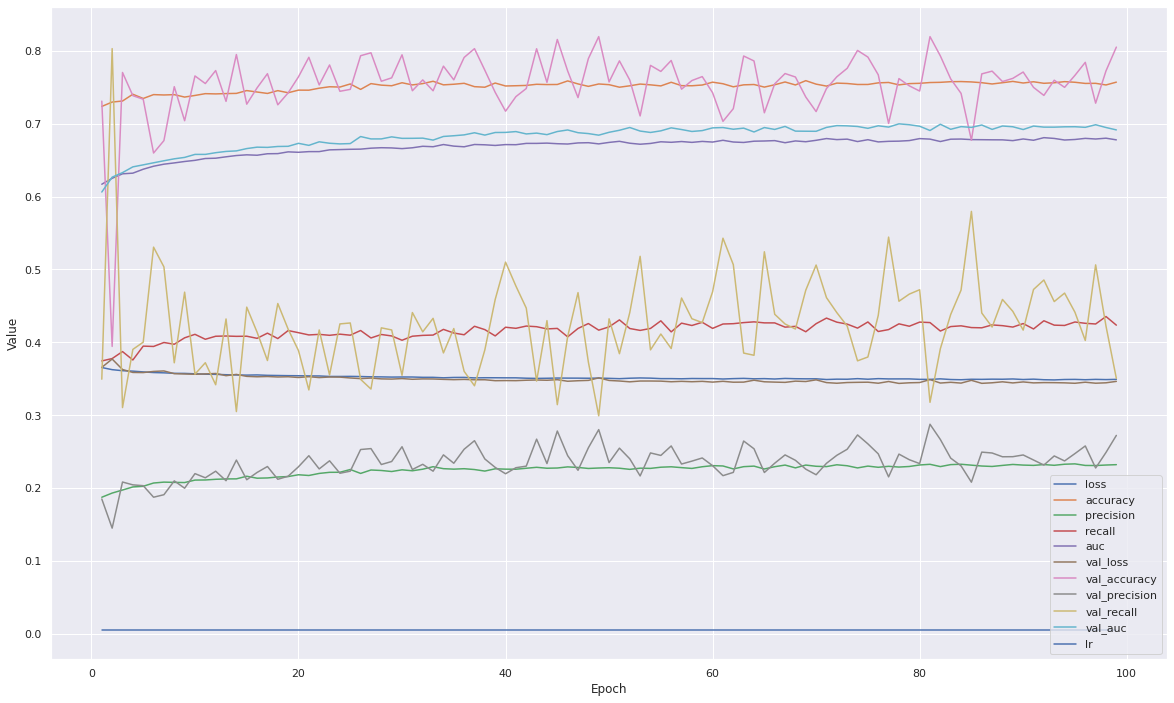

In [45]:
def plot_curve(epochs, hist):

  plt.figure(figsize=(20,12))
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in hist:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()


plot_curve(epochs, hist)

loss: 0.3331 - auc: 0.7323 - precision: 0.5627 - recall: 0.0582 - binary_accuracy: 0.8786 - val_loss: 0.3291 - val_auc: 0.7621 - val_precision: 0.6596 - val_recall: 0.0200 - val_binary_accuracy: 0.8782

In [46]:
y_pred = model.predict(x_test)

In [47]:
#y_pred = model.predict(x_test)
# Array para encontras threshold optimo
#thresholds = np.arange(0.0, 1.0, 0.0001)
#fscore = np.zeros(shape=(len(thresholds)))
#print('Length of sequence: {}'.format(len(thresholds)))


#for index, elem in enumerate(thresholds):

   #y_pred_prob = (y_pred > elem).astype('int')

    #fscore[index] = f1_score(y_test, y_pred_prob)


#index = np.argmax(fscore)
#thresholdOpt = round(thresholds[index], ndigits = 4)
#fscoreOpt = round(fscore[index], ndigits = 4)
#print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))

# XGBoost

In [48]:
x = data.drop(["Risk_Flag","Id"], axis=1)
y = data.Risk_Flag

x[num_cols] = StandardScaler().fit_transform(x[num_cols].astype(float))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 7)

In [49]:
data.Risk_Flag.value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [50]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [5,10],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

##model = xgb.XGBClassifier(objective="binary:logistic", verbosity=0)

#grid_cv = GridSearchCV(model, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

#grid_cv.fit(x_train, y_train)



In [51]:
#grid_cv.best_score_


In [52]:
#best_params = grid_cv.best_params_
#best_params
eval_set = [(x_train, y_train), (x_test, y_test)]

In [53]:
final_xgbcl = xgb.XGBClassifier(booster="gbtree",
                                gamma= 1,
                                learning_rate=0.6,
                                max_depth =14,
                                reg_lambda= 7,
                                reg_alpha = 1,
                                subsample= 0.9,
                                objective="binary:logistic",
                                colsample_bytree=0.7,
                                scale_pos_weight=1,
                                n_estimators = 300
                               )
    
final_xgbcl.fit(x_train,y_train,eval_set=eval_set,early_stopping_rounds=10,eval_metric=["auc","logloss"],)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.56894	validation_0-logloss:0.44776	validation_1-auc:0.55462	validation_1-logloss:0.44893
[1]	validation_0-auc:0.70900	validation_0-logloss:0.36602	validation_1-auc:0.67108	validation_1-logloss:0.37468
[2]	validation_0-auc:0.80767	validation_0-logloss:0.31790	validation_1-auc:0.75385	validation_1-logloss:0.33491
[3]	validation_0-auc:0.84947	validation_0-logloss:0.29434	validation_1-auc:0.79387	validation_1-logloss:0.31529
[4]	validation_0-auc:0.86550	validation_0-logloss:0.28308	validation_1-auc:0.80808	validation_1-logloss:0.30685
[5]	validation_0-auc:0.88262	validation_0-logloss:0.26964	validation_1-auc:0.81612	validation_1-logloss:0.29974
[6]	validation_0-auc:0.89699	validation_0-logloss:0.25773	validation_1-auc:0.83164	validation_1-logloss:0.29085
[7]	validation_0-auc:0.90432	validation_0-logloss:0.25061	validation_1-auc:0.83896	validation_1-logloss:0.28615
[8]	validation_0-auc:0.91149	validation_0-logloss:0.24367	validation_1-auc:0.84135	validation_1-logloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=1, reg_lambda=7, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [54]:
results = final_xgbcl.evals_result()
epochs = len(results["validation_0"]["auc"])
x_axis = range(0, epochs)

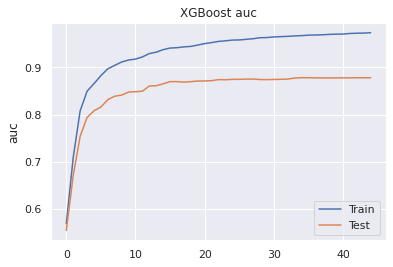

In [55]:
from matplotlib import pyplot

fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']["auc"], label='Train')
ax.plot(x_axis, results['validation_1']["auc"], label='Test')
ax.legend()
pyplot.ylabel("auc")
pyplot.title('XGBoost auc')
pyplot.show()

In [56]:
y_pred = final_xgbcl.predict(x_test)


In [57]:
print("-------------------------TEST SCORES XGBOOST-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES XGBOOST-----------------------
Recall: 32.1203
Precision: 58.0322
F1-Score: 41.3524
Accuracy score: 88.7937
AUC Score: 64.4312


# Logistic regression

In [58]:
datalr= data.copy()
x = datalr.drop(["Risk_Flag","Id"], axis=1)
y = datalr.Risk_Flag
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 7)
os = SMOTE(random_state=42)
columns = x_train.columns
os_data_x, os_data_y = os.fit_resample(x_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['Risk_Flag'])

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [60]:
logreg.fit(os_data_x, os_data_y)
y_pred = logreg.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
print("-------------------------TEST SCORES LOGREG-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES LOGREG-----------------------
Recall: 0.0
Precision: 0.0
F1-Score: 0.0
Accuracy score: 87.6997
AUC Score: 50.0


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
#def create_model_lr(learning_rate, METRICS):
    #model = keras.Sequential([
   # layers.BatchNormalization(input_shape=input_shape),
  #  layers.Dense(64, activation='relu'),
   # layers.BatchNormalization(),
  #  layers.Dropout(rate=0.4),
   #3 layers.Dense(128, activation='relu'),
  #  layers.BatchNormalization(),
  #  layers.Dropout(rate=0.4),
  #  layers.Dense(128, activation='relu'),
  #  layers.BatchNormalization(),
   # layers.Dropout(rate=0.4),
 #   layers.Dense(1, activation = "sigmoid")])
    
  #  model.compile(
  #  optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
   # loss='binary_crossentropy',
   # metrics=METRICS,
    #)
   # return model

#def train_model_lr(model,x_train, x_test, y_train, y_test, epochs):
   # history = model.fit(
 #   x_train, y_train,
  #  validation_data=(x_test, y_test),
   # batch_size=1024,
  #  epochs=epochs,
  #  callbacks=[early_stopping,ReduceLROnPlateau])
    
  #  epochs = history.epoch
    
  #  hist = pd.DataFrame(history.history)
   # return epochs, hist

In [63]:
#early_stopping = callbacks.EarlyStopping(
    #monitor = "AUC",
    #mode = "max",
    #patience = 8,
    #min_delta=0.001,
    #restore_best_weights=True,
#)
#ReduceLROnPlateau = callbacks.ReduceLROnPlateau(
   # monitor="AUC",
    #patience = 8)

In [64]:
#input_shape = [x_train.shape[1]]
#learning_rate = 0.006
#epochs = 100
#classification_threshold = 0.1566
#METRICS = [
#      keras.metrics.BinaryAccuracy(name='accuracy'),
#      keras.metrics.Precision(name='precision'),
 #     keras.metrics.Recall(name="recall"),
  #    keras.metrics.AUC()
   # ]

    
#model = create_model(learning_rate, METRICS)
#epochs, hist = train_model(model,x_train, x_test, y_train, y_test, epochs)